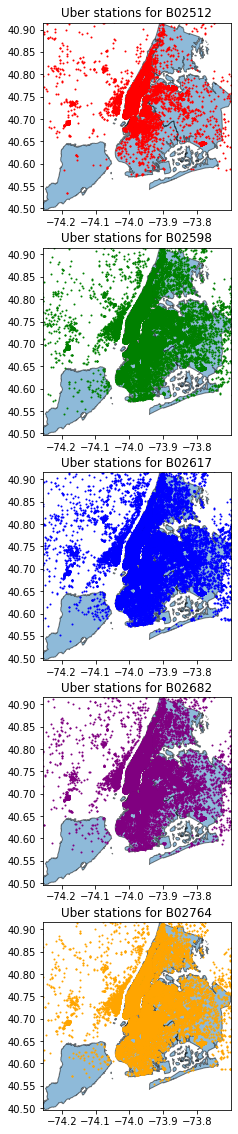

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

#работа с uber_df
uber_df = pd.read_csv("uber-raw-data-sep14.csv")
#на основе датафрейма uber_df создаю список точек по координатам
point_lst = [Point(xy) for xy in zip(uber_df['Lon'], uber_df['Lat'])]
#создаю геодатафрейм с полем geometry
uber_gdf = gpd.GeoDataFrame(uber_df, crs='epsg:4326', geometry=point_lst)
#print(uber_gdf.head(5)) #проверка на корректность

#группировка по базовым станциям
grouped_stations_gdf = uber_gdf.groupby('Base')
#print(grouped_stations_gdf.head(5)) #проверка на корректность
colors = ['red', 'green', 'blue', 'purple', 'orange'] # Цвета для каждой группы


#работа с геоданными Нью-Йорка
ny_gdf = gpd.read_file('ny')
ny_gdf = ny_gdf.to_crs(4326) #изначально данные в формате wsg84, перевожу для сопоставления
#ny_gdf.plot(figsize=(10, 10)) #проверка на корректность
bounds = ny_gdf.total_bounds #вычисляю границы геодатафрейма ny_gdf 


#работа с фигурой
#тк я знаю, что базовых станций 5, кол-во строк=5, кол-во столбцов=1
nrows, ncols = 5, 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 20))

#цикл по группам
for i, (name, group) in enumerate(grouped_stations_gdf):
    #устанавливаю границы Нью-Йорка на подграфике
    axes[i].set_xlim(bounds[0], bounds[2])
    axes[i].set_ylim(bounds[1], bounds[3])
    
    #для каждого графика свой цвет точек и свой заголовок
    color = colors[i % len(colors)]
    axes[i].set_title(f'Uber stations for {name}')

    #отображаю границы Нью-Йорка на графике и добавляю точки
    ny_gdf.plot(ax=axes[i], alpha=0.5, edgecolor='k')
    group.plot(ax=axes[i], color=color, label=name, markersize=1)
    
plt.show()


